<a href="https://colab.research.google.com/github/BachokunIAR/DL-tensorflow/blob/main/tf_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cv2
import os
from PIL import *

import PIL.Image as Image
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

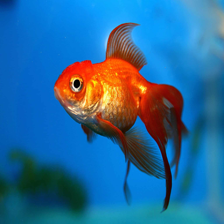

In [3]:
gold_fish = Image.open("/content/drive/MyDrive/Data/flower_photos/goldfish.jpg").resize(IMAGE_SHAPE)
gold_fish

In [4]:
gold_fish = np.array(gold_fish)/255.0
gold_fish.shape

(224, 224, 3)

In [5]:
gold_fish[np.newaxis,...]

array([[[[0.01568627, 0.17254902, 0.40392157],
         [0.01568627, 0.17254902, 0.40392157],
         [0.01568627, 0.17254902, 0.40392157],
         ...,
         [0.16078431, 0.59607843, 0.81568627],
         [0.13333333, 0.58039216, 0.82745098],
         [0.12941176, 0.57647059, 0.82352941]],

        [[0.01960784, 0.17254902, 0.43529412],
         [0.01960784, 0.17254902, 0.43137255],
         [0.01960784, 0.17254902, 0.43137255],
         ...,
         [0.14901961, 0.59215686, 0.80784314],
         [0.12941176, 0.57647059, 0.82352941],
         [0.12941176, 0.57647059, 0.82352941]],

        [[0.01960784, 0.18431373, 0.4627451 ],
         [0.01960784, 0.18823529, 0.45882353],
         [0.01176471, 0.18823529, 0.44705882],
         ...,
         [0.16862745, 0.56862745, 0.80784314],
         [0.1372549 , 0.56862745, 0.82352941],
         [0.11764706, 0.57254902, 0.81960784]],

        ...,

        [[0.03137255, 0.29803922, 0.38823529],
         [0.03921569, 0.30588235, 0.39215686]

In [6]:
gold_fish[np.newaxis,...].shape

(1, 224, 224, 3)

In [7]:
results = classifier.predict(gold_fish[np.newaxis,...])
results

1/1 [==============================] - 1s 1s/step


array([[ 0.24242541,  1.9212276 ,  9.756567  , ..., -1.2463242 ,
        -0.74513996,  0.42147648]], dtype=float32)

In [8]:
results.shape

(1, 1001)

In [9]:
predicted_label_index = np.argmax(results)
predicted_label_index

2

In [10]:
#tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
# tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
image_labels = []
with open("/content/drive/MyDrive/Data/flower_photos/ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [11]:
image_labels[predicted_label_index]

'goldfish'

# <font color = red> Predicting another image

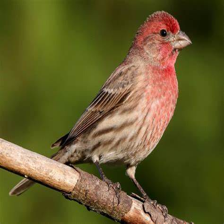

In [12]:
#Predict another image
house_flinch = Image.open("/content/drive/MyDrive/Data/flower_photos/house_flinch.jpg").resize(IMAGE_SHAPE)
house_flinch

In [13]:
house_flinch = np.array(house_flinch)/225.0
house_flinch.shape

(224, 224, 3)

In [14]:
house_flinch[np.newaxis,...].shape

(1, 224, 224, 3)

In [15]:
results1 = classifier.predict(house_flinch[np.newaxis,...])
results1

1/1 [==============================] - 0s 124ms/step


array([[ 0.11060315, -0.83323157,  0.10838781, ..., -1.2229638 ,
        -1.2297469 ,  0.43876094]], dtype=float32)

In [16]:
results1.shape

(1, 1001)

In [17]:
predicted_label_index = np.argmax(results1)
predicted_label_index

13

In [18]:
#image_labels[predicted_labebel_idex]
image_labels[predicted_label_index]

'house finch'

# <font color = red> Getting the flower dataset

In [19]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir="D:\ML-engineering\Projects_file\transfer_learnig_tf", untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [20]:
data_dir

'/tmp/.keras/datasets/flower_photos'

In [21]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('/tmp/.keras/datasets/flower_photos')

In [22]:
list(data_dir.glob('*/*jpg'))[:10]

[PosixPath('/tmp/.keras/datasets/flower_photos/sunflowers/4933229889_c5d9e36392.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/sunflowers/22203670478_9ec5c2700b_n.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/sunflowers/12471443383_b71e7a7480_m.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/sunflowers/4932735362_6e1017140f.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/sunflowers/19915160340_ec904edbdf_n.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/sunflowers/20621698991_dcb323911d.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/sunflowers/8481979626_98c9f88848_n.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/sunflowers/3596902268_049e33a2cb_n.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/sunflowers/4927658421_7eed83bc95_m.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/sunflowers/9610098411_f1613c8e14.jpg')]

In [23]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [24]:
daisy = list(data_dir.glob('daisy/*'))
daisy[:5]

[PosixPath('/tmp/.keras/datasets/flower_photos/daisy/181007802_7cab5ee78e_n.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/daisy/2480569557_f4e1f0dcb8_n.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/daisy/9529916092_de70623523_n.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/daisy/8489463746_a9839bf7e4.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/daisy/5110105726_53eb7a93be_m.jpg')]

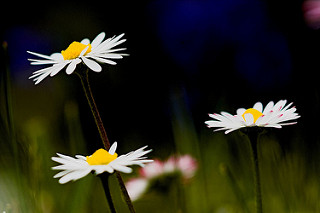

In [25]:
Image.open(str(daisy[1]))

In [26]:
tulips = list(data_dir.glob('tulips/*'))
tulips[:5]

[PosixPath('/tmp/.keras/datasets/flower_photos/tulips/14487712670_aebe715525_m.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/tulips/16732302779_8aa56f255d_n.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/tulips/4418204816_018375acd0_m.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/tulips/14093565032_a8f1e349d1.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/tulips/13513846963_c3d5e9fb1d_n.jpg')]

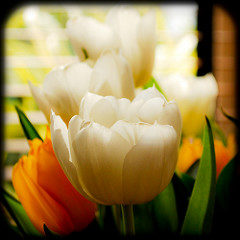

In [27]:
Image.open(str(tulips[2]))

In [28]:
sunflower = list(data_dir.glob('sunflowers/*'))
sunflower[:5]

[PosixPath('/tmp/.keras/datasets/flower_photos/sunflowers/4933229889_c5d9e36392.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/sunflowers/22203670478_9ec5c2700b_n.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/sunflowers/12471443383_b71e7a7480_m.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/sunflowers/4932735362_6e1017140f.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/sunflowers/19915160340_ec904edbdf_n.jpg')]

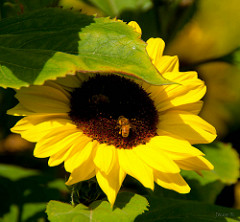

In [29]:
Image.open(str(sunflower[2]))

# <font color = green> Read flowers images from disk into numpy array using opencv

In [30]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
} # images dictionary

In [31]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
} # dictionary for image labels

In [32]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(240, 320, 3)

In [33]:
cv2.resize(img,(224,224)).shape  # rescale th images to have thesame size

(224, 224, 3)

In [34]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(IMAGE_SHAPE)) # resize allthe iamges to thesamae size
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [35]:
X = np.array(X)
y = np.array(y)

# <font color =green> Train Test Split

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X, y, random_state= 42)

# <font color = green> Prepocessing and simage scaling

In [37]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

# Make prediction using pre-trained model on new flowers dataset

In [38]:
X[0].shape

(224, 224, 3)

In [39]:
IMAGE_SHAPE +(3,)

(224, 224, 3)

In [40]:
x0_resized = cv2.resize(X[0], IMAGE_SHAPE)
x1_resized = cv2.resize(X[1], IMAGE_SHAPE)
x2_resized = cv2.resize(X[2], IMAGE_SHAPE)
x3_resized = cv2.resize(X[3], IMAGE_SHAPE)
x4_resized = cv2.resize(X[4], IMAGE_SHAPE)

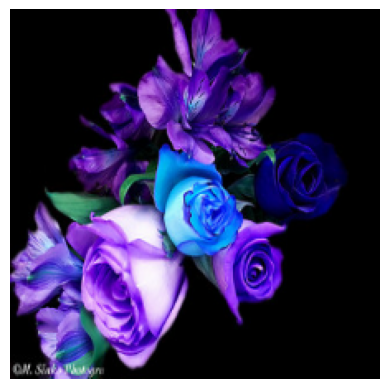

In [41]:
plt.axis(False)
plt.imshow(X[2]);

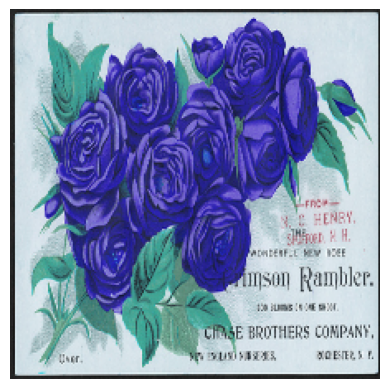

In [42]:
plt.axis(False)
plt.imshow(X[3]);

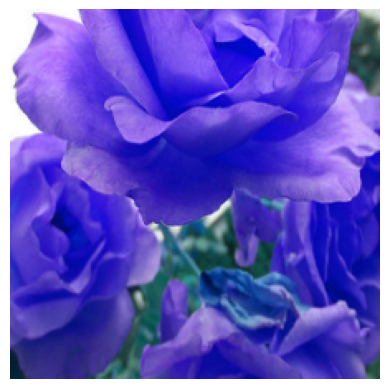

In [43]:
plt.axis(False)
plt.imshow(X[1]);

In [44]:
predicted = classifier.predict(np.array([x1_resized, x2_resized, x3_resized,x4_resized]))
predicted = np.argmax(predicted, axis=1)
predicted

1/1 [==============================] - 1s 665ms/step


array([795, 116, 550, 550])

In [45]:
image_labels[116]

'sea slug'

In [46]:
image_labels[550]

'envelope'

# <font color = red> Now take pre-trained model and retrain it using flowers images

In [47]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [48]:
num_of_flowers = 5 # there are 5 flower types

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2264389 (8.64 MB)
Trainable params: 6405 (25.02 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)